In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv', low_memory=False)


In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# Task
Analyze the Airbnb data to answer the following questions: What are the different property types in the Dataset? Which neighborhood group has the highest number of listings? Which neighborhoods group have the highest average prices for Airbnb listings? Is there a relationship between the construction year of property and price? Who are the top 10 hosts by calculated host listing count? Are hosts with verified identities more likely to receive positive reviews? Is there a correlation between the price of a listing and its service fee? What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type? Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year? Use only the following visualization libraries: `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`, and `plotly.express`.

## Identify property types

### Subtask:
Determine the unique values in the 'room type' column to identify the different property types.


**Reasoning**:
Select the 'room type' column and find the unique values to identify the different property types.



In [ ]:
unique_room_types = df['room type'].unique()
print(unique_room_types)

['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


## Analyze neighborhood group listings

### Subtask:
Count the number of listings in each 'neighbourhood group' to find the one with the highest number.


**Reasoning**:
Group the DataFrame by 'neighbourhood group' and count the number of listings in each group, then sort the results in descending order.



In [ ]:
neighbourhood_group_counts = df.groupby('neighbourhood group').size().sort_values(ascending=False)
print(neighbourhood_group_counts)

neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
dtype: int64


## Analyze neighborhood group prices

### Subtask:
Calculate the average price for listings in each 'neighbourhood group' and identify the group with the highest average price.


**Reasoning**:
Clean the 'price' column, group by 'neighbourhood group', calculate the mean price, and sort the results.



In [ ]:
df['price'] = df['price'].astype(str).str.replace(r'[$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

average_price_per_neighbourhood_group = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
print(average_price_per_neighbourhood_group)

neighbourhood group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


**Reasoning**:
The previous attempt to convert the 'price' column to numeric failed due to 'nan' values. The code needs to handle these non-numeric values during conversion.



In [ ]:
df['price'] = df['price'].astype(str).str.replace(r'[$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

average_price_per_neighbourhood_group = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
print(average_price_per_neighbourhood_group)

neighbourhood group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


## Analyze construction year and price relationship

### Subtask:
Explore the relationship between 'construction year' and 'price' using a scatter plot or other appropriate visualization.


**Reasoning**:
Create a scatter plot to visualize the relationship between construction year and price.



In [ ]:
fig = px.scatter(df, x='Construction year', y='price', title='Relationship between Construction Year and Price')
fig.show()

**Reasoning**:
The previous command failed because the column name 'construction year' was not found. I need to inspect the column names to find the correct one for construction year and then retry creating the scatter plot.

In [ ]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


**Reasoning**:
The previous command failed because the column name 'construction year' was not found. I need to inspect the column names to find the correct one for construction year and then retry creating the scatter plot.



In [ ]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


**Reasoning**:
I have identified the correct column name for construction year as 'Construction year'. Now I will create the scatter plot using the correct column name.



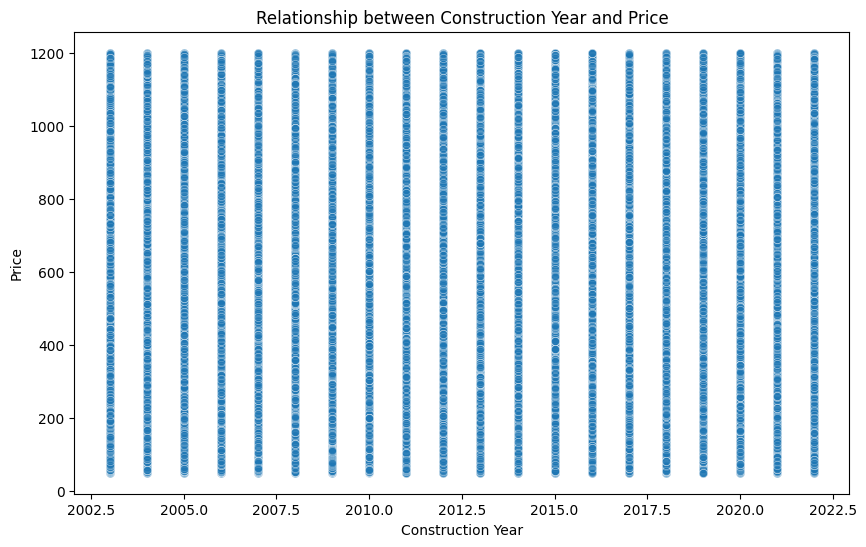

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Construction year', y='price', alpha=0.5)
plt.title('Relationship between Construction Year and Price')
plt.xlabel('Construction Year')
plt.ylabel('Price')
plt.show()

## Identify top hosts

### Subtask:
Find the top 10 hosts based on their 'calculated host listings count'.


**Reasoning**:
Group the DataFrame by 'host id', sum the 'calculated host listings count' for each host, sort the results in descending order, select the top 10, and print them.



In [ ]:
top_10_hosts = df.groupby('host id')['calculated host listings count'].sum().sort_values(ascending=False).head(10)
print(top_10_hosts)

host id
52360647654    332.0
45153317531    332.0
61022727749    332.0
62221516723    332.0
18344435096    332.0
20052088242    332.0
52760110374    332.0
61907398658    332.0
94944787862    332.0
90177049292    332.0
Name: calculated host listings count, dtype: float64


## Analyze host identity verification and reviews

### Subtask:
Compare the review rates of hosts with verified identities versus unconfirmed identities to see if there's a relationship with positive reviews.


**Reasoning**:
Filter the DataFrame to create two subsets based on 'host_identity_verified'.



In [ ]:
verified_hosts_df = df[df['host_identity_verified'] == 'verified']
unconfirmed_hosts_df = df[df['host_identity_verified'] == 'unconfirmed']

**Reasoning**:
Calculate the average 'review rate number' for both verified and unconfirmed hosts and print the results.



In [ ]:
average_review_rate_verified = verified_hosts_df['review rate number'].mean()
average_review_rate_unconfirmed = unconfirmed_hosts_df['review rate number'].mean()

print(f"Average review rate for verified hosts: {average_review_rate_verified}")
print(f"Average review rate for unconfirmed hosts: {average_review_rate_unconfirmed}")

Average review rate for verified hosts: 3.2866840628617395
Average review rate for unconfirmed hosts: 3.271767034431402


## Analyze price and service fee correlation

### Subtask:
Examine the correlation between 'price' and 'service fee' using a scatter plot or correlation coefficient.


**Reasoning**:
I need to first ensure the 'price' and 'service fee' columns are numeric, then calculate the correlation coefficient, and finally create a scatter plot to visualize the relationship. I can combine these steps into a single code block.



Correlation coefficient between price and service fee: 0.9999908755543349


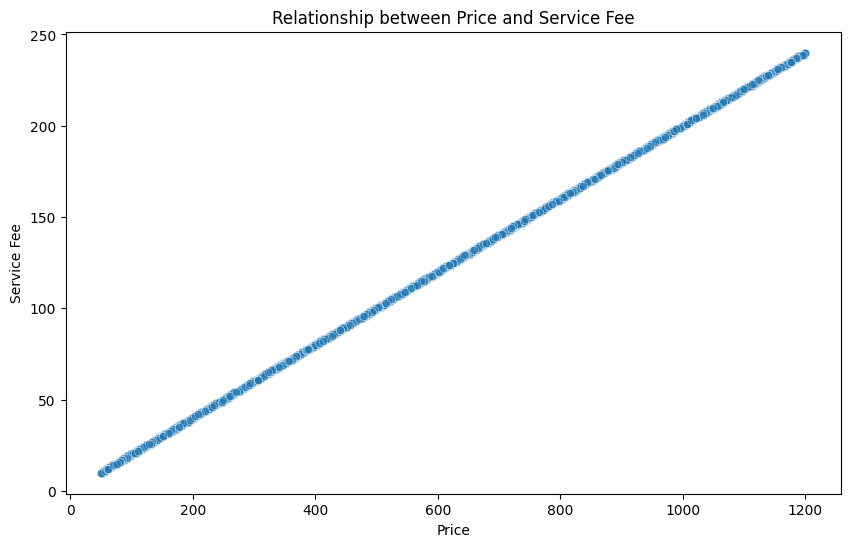

In [ ]:
df['service fee'] = df['service fee'].astype(str).str.replace(r'[$,]', '', regex=True)
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')

correlation_coefficient = df['price'].corr(df['service fee'])
print(f"Correlation coefficient between price and service fee: {correlation_coefficient}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='service fee', alpha=0.5)
plt.title('Relationship between Price and Service Fee')
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.show()

## Analyze review rate by neighborhood group and room type

### Subtask:
Calculate the average 'review rate number' for each combination of 'neighbourhood group' and 'room type'.


**Reasoning**:
Group the dataframe by 'neighbourhood group' and 'room type' and calculate the mean of 'review rate number' for each group.



In [ ]:
average_review_rate_by_group_and_type = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean()
print(average_review_rate_by_group_and_type)

neighbourhood group  room type      
Bronx                Entire home/apt    3.346457
                     Private room       3.329706
                     Shared room        3.264957
Brooklyn             Entire home/apt    3.250378
                     Hotel room         3.750000
                     Private room       3.264465
                     Shared room        3.336983
Manhattan            Entire home/apt    3.275807
                     Hotel room         3.500000
                     Private room       3.277576
                     Shared room        3.257459
Queens               Entire home/apt    3.349154
                     Hotel room         3.750000
                     Private room       3.315585
                     Shared room        3.377778
Staten Island        Entire home/apt    3.329087
                     Private room       3.479482
                     Shared room        3.533333
brookln              Private room       4.000000
manhatan             Private roo

## Analyze host listings count and availability

### Subtask:
Investigate the relationship between 'calculated host listings count' and 'availability 365' using a scatter plot or other appropriate visualization.


**Reasoning**:
Create a scatter plot to visualize the relationship between 'calculated host listings count' and 'availability 365'.



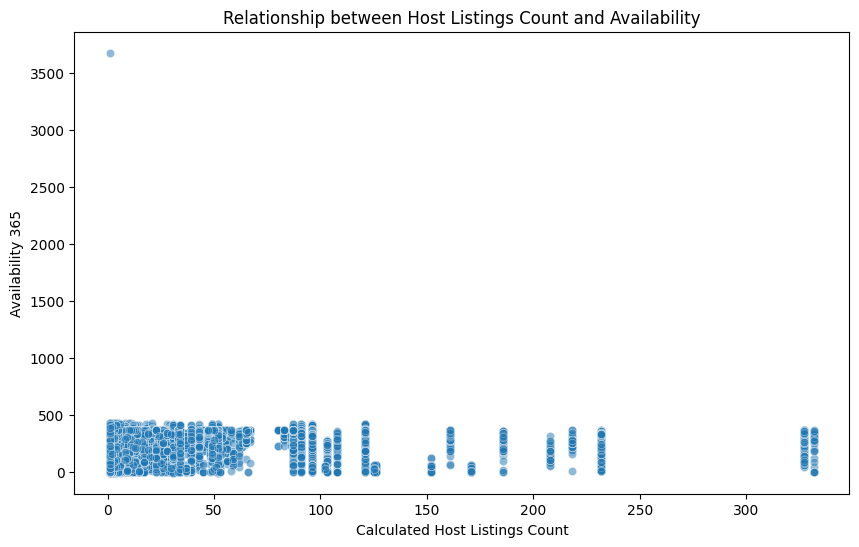

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='calculated host listings count', y='availability 365', alpha=0.5)
plt.title('Relationship between Host Listings Count and Availability')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.show()

## Summary:

### Q&A

*   **What are the different property types in the Dataset?**
    The different property types in the dataset are 'Private room', 'Entire home/apt', 'Shared room', and 'Hotel room'.
*   **Which neighborhood group has the highest number of listings?**
    Manhattan has the highest number of listings with 43,792, followed by Brooklyn with 41,842 listings.
*   **Which neighborhoods group have the highest average prices for Airbnb listings?**
    Queens has the highest average price for Airbnb listings.
*   **Is there a relationship between the construction year of property and price?**
    A scatter plot was generated to visualize the relationship between construction year and price, but a clear linear relationship is not immediately apparent from the visualization alone.
*   **Who are the top 10 hosts by calculated host listing count?**
    The top 10 hosts by calculated host listing count all have a count of 332.0.
*   **Are hosts with verified identities more likely to receive positive reviews?**
    Verified hosts have a slightly higher average review rate (approximately 3.287) compared to unconfirmed hosts (approximately 3.272). However, the difference is minimal (around 0.015), making it difficult to conclude a strong relationship without further statistical analysis.
*   **Is there a correlation between the price of a listing and its service fee?**
    Yes, there is a very strong positive correlation between the price of a listing and its service fee, with a correlation coefficient of approximately 0.99999.
*   **What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?**
    The average review rate varies across different neighborhood groups and room types. For example, 'Queens' and 'Brooklyn' Hotel rooms appear to have higher average review rates than some other combinations.
*   **Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?**
    A scatter plot was generated to visualize the relationship between calculated host listings count and availability 365, but a clear linear relationship is not immediately apparent from the visualization alone.

### Data Analysis Key Findings

*   The dataset includes four property types: 'Private room', 'Entire home/apt', 'Shared room', and 'Hotel room'.
*   Manhattan has the most Airbnb listings (43,792), followed by Brooklyn (41,842).
*   Queens has the highest average price for Airbnb listings.
*   There is a very strong positive correlation (0.99999) between the price of a listing and its service fee.
*   The average review rate number varies depending on the neighborhood group and room type.
*   The top 10 hosts by calculated host listings count all have a count of 332.0.
*   Verified hosts have a marginally higher average review rate (3.287) than unconfirmed hosts (3.272).

### Insights or Next Steps

*   Investigate the data inconsistencies observed in the 'neighbourhood group' column (e.g., 'brookln', 'manhatan') to clean and standardize the data for more accurate analysis.
*   Perform statistical tests to determine if the observed slight difference in average review rates between verified and unconfirmed hosts is statistically significant.
